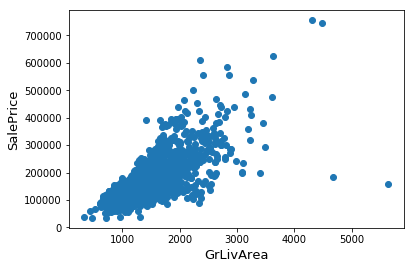

In [8]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt


def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [9]:
print(train[['SalePrice']].mean())
y = np.log1p(train[['SalePrice']])
print(y.mean())
y = y.SalePrice
print(y.mean())

total = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                    test.loc[:,'MSSubClass':'SaleCondition']))

total = pd.get_dummies(total)
total = total.fillna(total.mean())
x_train = np.array(total[:train.shape[0]])
x_test = np.array(total[test.shape[0]+1:])
x_train = StandardScaler().fit_transform(x_train)
X_tr, X_val, y_tr, y_val = train_test_split(x_train, y)

X_val.shape

SalePrice    180921.19589
dtype: float64
SalePrice    12.024057
dtype: float64
12.024057394918371


(365, 288)

In [10]:
model = Sequential()
BatchNormalization()
model.add(Dense(1024,input_dim=288,activation='relu', kernel_initializer='normal'))
BatchNormalization()
Dropout(0.5)
model.add(Dense(512,input_dim=1024,activation='relu', kernel_initializer='normal'))
BatchNormalization()
Dropout(0.5)
model.add(Dense(256,activation='relu', kernel_initializer='normal'))
BatchNormalization()
Dropout(0.5)
model.add(Dense(512,activation='relu', kernel_initializer='normal'))
BatchNormalization()
Dropout(0.5)
model.add(Dense(512,activation='relu', kernel_initializer='normal'))
BatchNormalization()
Dropout(0.5)
model.add(Dense(1))
model.compile( optimizer='adam',loss='mse',metrics=['mean_squared_error'])


model.fit(X_tr,y_tr,validation_data=(X_val,y_val),nb_epoch=20,batch_size=100,verbose=2)

model.summary()


C:\Users\biswa\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1095 samples, validate on 365 samples
Epoch 1/20
 - 1s - loss: 41.8222 - mean_squared_error: 41.8222 - val_loss: 10.7198 - val_mean_squared_error: 10.7198
Epoch 2/20
 - 0s - loss: 7.1471 - mean_squared_error: 7.1471 - val_loss: 2.7072 - val_mean_squared_error: 2.7072
Epoch 3/20
 - 0s - loss: 1.7779 - mean_squared_error: 1.7779 - val_loss: 1.4468 - val_mean_squared_error: 1.4468
Epoch 4/20
 - 0s - loss: 0.7985 - mean_squared_error: 0.7985 - val_loss: 1.0650 - val_mean_squared_error: 1.0650
Epoch 5/20
 - 0s - loss: 0.3595 - mean_squared_error: 0.3595 - val_loss: 0.9026 - val_mean_squared_error: 0.9026
Epoch 6/20
 - 0s - loss: 0.2166 - mean_squared_error: 0.2166 - val_loss: 0.7732 - val_mean_squared_error: 0.7732
Epoch 7/20
 - 0s - loss: 0.1194 - mean_squared_error: 0.1194 - val_loss: 0.7230 - val_mean_squared_error: 0.7230
Epoch 8/20
 - 0s - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.7255 - val_mean_squared_error: 0.7255
Epoch 9/20
 - 0s - loss: 0.0438 - mean_square

In [11]:
preds = model.predict(np.array(X_val))
print(preds.shape)
print(X_val.shape)
print(y_val.shape)


print(y_val.mean())
print(preds.mean())
print(rmse(preds[0],y_val))

preds = model.predict(np.array(x_test))

sub = pd.read_csv("./sample_submission.csv")

sub.iloc[:,1] = np.array(model.predict(np.array(x_test)))
print(sub[['SalePrice']].mean())
sub['SalePrice'] = np.expm1(sub[['SalePrice']])
print(sub[['SalePrice']].mean())
sub.to_csv('kerassubmission9.csv', index=None)
print(sub.to_csv)


(365, 1)
(365, 288)
(365,)
12.037329871662253
11.9475355
0.5100022267627761
SalePrice    6489.761162
dtype: float64
SalePrice    inf
dtype: float64
<bound method NDFrame.to_csv of         Id  SalePrice
0     1461        inf
1     1462        inf
2     1463        inf
3     1464        inf
4     1465        inf
5     1466        inf
6     1467        inf
7     1468        inf
8     1469        inf
9     1470        inf
10    1471        inf
11    1472        inf
12    1473        inf
13    1474        inf
14    1475        inf
15    1476        inf
16    1477        inf
17    1478        inf
18    1479        inf
19    1480        inf
20    1481        inf
21    1482        inf
22    1483        inf
23    1484        inf
24    1485        inf
25    1486        inf
26    1487        inf
27    1488        inf
28    1489        inf
29    1490        inf
...    ...        ...
1429  2890        inf
1430  2891        inf
1431  2892        inf
1432  2893        inf
1433  2894        inf
1434  

C:\Users\biswa\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in expm1
